In [13]:
import numpy as np 
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
#Import paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
(xtrain, ytrain),(xtest,ytest) = fashion_mnist.load_data()
ytrain[100]

8

Text(0.5, 1.0, 'Label: 8')

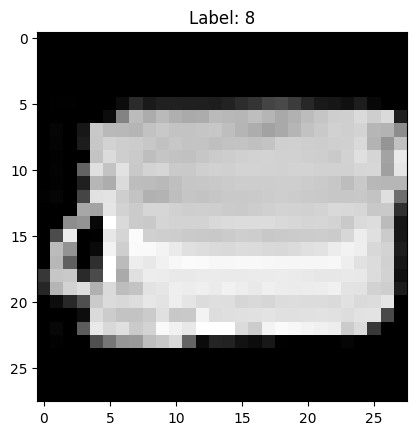

In [15]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap = plt.cm.gray)
plt.title('Label: '+str(ytrain[sample]))

In [16]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

if backend.image_data_format() == 'channels_first':
  xtrain = xtrain.reshape(xtrain.shape[0], 1, 28, 28)
  xtest = xtest.reshape(xtest.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
  xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

print(xtrain.shape)

(60000, 28, 28, 1)


In [17]:
ytrain = keras.utils.to_categorical(ytrain, 10)
print(ytrain)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
def build_model():
  model = Sequential()
  model.add(Conv2D(20,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.20))

  model.add(Conv2D(40,kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.20))

  model.add(Conv2D(80,kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.20))
  

  model.add(Flatten())
  model.add(Dense(5, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  return model

In [19]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 20)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 20)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 40)        7240      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 40)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 40)         

In [20]:
model.fit(xtrain, ytrain, batch_size=1000, epochs=12, verbose =1, validation_split=0.17)

Epoch 1/12
50/50 [==============================] - 40s 767ms/step - loss: 2.1810 - accuracy: 0.1801 - val_loss: 1.9814 - val_accuracy: 0.4513
Epoch 2/12
50/50 [==============================] - 38s 756ms/step - loss: 2.0225 - accuracy: 0.2660 - val_loss: 1.8097 - val_accuracy: 0.5208
Epoch 3/12
50/50 [==============================] - 37s 741ms/step - loss: 1.9188 - accuracy: 0.2998 - val_loss: 1.6379 - val_accuracy: 0.5865
Epoch 4/12
50/50 [==============================] - 35s 712ms/step - loss: 1.8428 - accuracy: 0.3234 - val_loss: 1.5217 - val_accuracy: 0.6399
Epoch 5/12
50/50 [==============================] - 37s 738ms/step - loss: 1.7824 - accuracy: 0.3462 - val_loss: 1.4068 - val_accuracy: 0.6644
Epoch 6/12
50/50 [==============================] - 37s 737ms/step - loss: 1.7296 - accuracy: 0.3540 - val_loss: 1.3279 - val_accuracy: 0.7121
Epoch 7/12
50/50 [==============================] - 37s 740ms/step - loss: 1.6867 - accuracy: 0.3623 - val_loss: 1.2143 - val_accuracy: 0.7445

In [21]:
ypred=model.predict(xtest)
print('Salida de la red:\n', ypred[0])

ypred = np.argmax(ypred, axis=1)
print('Predicciones:\n', ypred)

print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

313/313 [==============================] - 2s 8ms/step
Salida de la red:
 [8.3771674e-04 6.3596829e-04 1.5254500e-06 2.2942956e-04 1.9386238e-04
 2.0767066e-01 1.2410985e-05 1.5636840e-01 6.9113616e-05 6.3398093e-01]
Predicciones:
 [9 2 1 ... 8 1 7]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.97      0.93      0.95      1000
           2       0.60      0.36      0.45      1000
           3       0.78      0.83      0.80      1000
           4       0.43      0.88      0.58      1000
           5       0.92      0.89      0.90      1000
           6       0.33      0.09      0.14      1000
           7       0.90      0.79      0.84      1000
           8       0.94      0.93      0.93      1000
           9       0.83      0.97      0.90      1000

    accuracy                           0.75     10000
   macro avg       0.74      0.75      0.73     10000
weighted avg       